#  机器实战----逻辑回归

In [11]:
# Logistic 回归梯度上升优化算法
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        #print("每行的数据：",lineArr)
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat
import numpy as np
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

In [12]:
dataMat,labelMat=loadDataSet()
dataMat,labelMat

([[1.0, -0.017612, 14.053064],
  [1.0, -1.395634, 4.662541],
  [1.0, -0.752157, 6.53862],
  [1.0, -1.322371, 7.152853],
  [1.0, 0.423363, 11.054677],
  [1.0, 0.406704, 7.067335],
  [1.0, 0.667394, 12.741452],
  [1.0, -2.46015, 6.866805],
  [1.0, 0.569411, 9.548755],
  [1.0, -0.026632, 10.427743],
  [1.0, 0.850433, 6.920334],
  [1.0, 1.347183, 13.1755],
  [1.0, 1.176813, 3.16702],
  [1.0, -1.781871, 9.097953],
  [1.0, -0.566606, 5.749003],
  [1.0, 0.931635, 1.589505],
  [1.0, -0.024205, 6.151823],
  [1.0, -0.036453, 2.690988],
  [1.0, -0.196949, 0.444165],
  [1.0, 1.014459, 5.754399],
  [1.0, 1.985298, 3.230619],
  [1.0, -1.693453, -0.55754],
  [1.0, -0.576525, 11.778922],
  [1.0, -0.346811, -1.67873],
  [1.0, -2.124484, 2.672471],
  [1.0, 1.217916, 9.597015],
  [1.0, -0.733928, 9.098687],
  [1.0, -3.642001, -1.618087],
  [1.0, 0.315985, 3.523953],
  [1.0, 1.416614, 9.619232],
  [1.0, -0.386323, 3.989286],
  [1.0, 0.556921, 8.294984],
  [1.0, 1.224863, 11.58736],
  [1.0, -1.347803, -2.4

In [13]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #转换 NumPy matrix
    labelMat = np.mat(classLabels).transpose() #转换 NumPy matrix
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult，得到label值
        error = (labelMat - h)              #loss
        weights = weights + alpha * dataMatrix.transpose()* error #不明白这跟梯度上升算法，怎么结合到一起的，没看到求导的运算
    return weights

In [14]:
weights=gradAscent(dataMat,labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [15]:
# 画出决策边界
import matplotlib.pyplot as plt
% matplotlib inline
def plotBestFit(weights):
    
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()

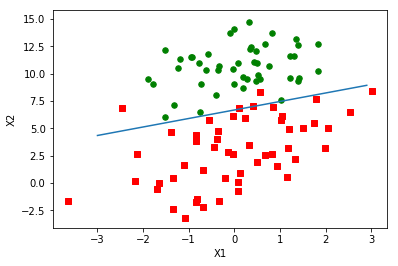

In [17]:
plotBestFit(weights.getA())

In [37]:
#随机梯度上升
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.005
    weights = np.ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [38]:
weights1=stocGradAscent0(np.array(dataMat),labelMat)
weights1

array([ 0.94202721,  0.9325521 , -0.3195362 ])

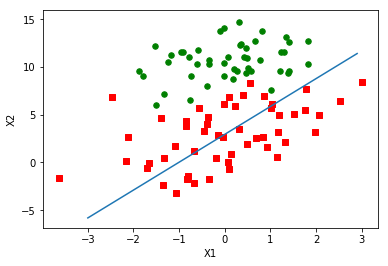

In [39]:
plotBestFit(weights1)

In [46]:
# 改进随机梯度算法
def stocGradAscent1(dataMatrix, classLabels, numIter=500):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not
            randIndex = int(np.random.uniform(0, len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

In [48]:
weights2=stocGradAscent1(np.array(dataMat),labelMat)
weights2

array([13.69666047,  0.88663423, -1.90918153])

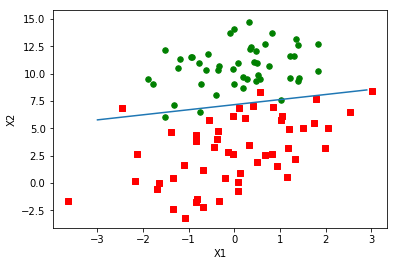

In [49]:
plotBestFit(weights2)

 # 从疝气病症测病马的死亡率

In [50]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate of this test is: %f" % errorRate)
    return errorRate